<a href="https://colab.research.google.com/github/SynthExplorer/Talleres-Python/blob/main/Ejercicio_N%C2%B0_15_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

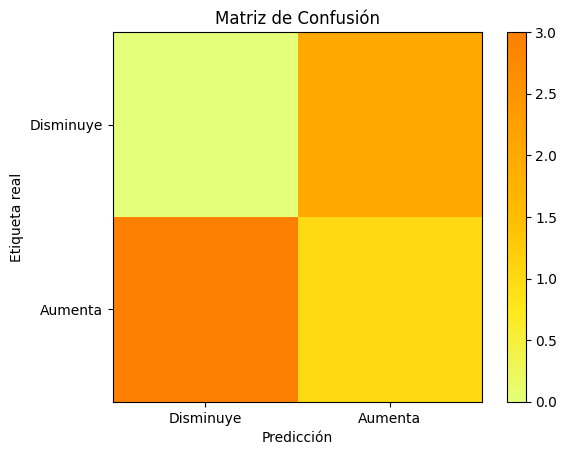

Matriz de Confusión:
[[0 2]
 [3 1]]
Accuracy: 0.17
Precision: 0.33
Recall: 0.25
F1-Score: 0.29


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# El archivo importado no dejaba de reportar fallas, como en el formato de la fecha, y otros valores que intenté cuadrar, pero no funcionó, así que, me toco cargalos directamente aquí. 😅



###### Y, no puede probar la interfaz, el Visual no me ejecutaba los códigos que ponía, intenté con varios compiladores y nada, además de reinstalar el visual 3 veces.
#Así que, se hizo lo más importante que creía 😓
data = pd.DataFrame({
    'Fecha': ["2/01/2023", "3/01/2023", "4/01/2023", "5/01/2023", "6/01/2023", "7/01/2023", "8/01/2023", "9/01/2023", "10/01/2023", "11/01/2023", "12/01/2023", "13/01/2023", "14/01/2023", "15/01/2023", "16/01/2023", "17/01/2023", "18/01/2023", "19/01/2023", "20/01/2023", "21/01/2023"],
    'Último': ["35.953", "35.447", "34.669", "34.490", "34.551", "34.104", "33.942", "34.184", "34.504", "33.943", "33.069", "30.023", "29.922", "29.689", "28.745", "28.332", "28.410", "28.524", "27.168", "26.871"],
    'Apertura': ["34.335", "34.669", "34.490", "34.552", "34.104", "33.942", "34.184", "34.504", "33.943", "33.069", "30.023", "29.922", "29.689", "28.745", "28.332", "28.410", "28.524", "27.168", "26.871", "26.875"],
    'Máximo': ["35.953", "35.561", "34.730", "34.876", "34.783", "34.494", "34.268", "34.843", "35.147", "35.175", "33.525", "30.225", "30.343", "30.232", "28.904", "28.978", "28.624", "30.067", "27.297", "26.995"],
    'Mínimo': ["34.335", "34.114", "34.111", "34.117", "33.969", "33.906", "33.430", "33.770", "33.756", "32.852", "29.923", "29.704", "29.478", "28.619", "28.155", "28.171", "28.109", "27.129", "26.832", "26.830"],
    'Vol.': ["2,79K", "1,99K", "1,39K", "1,36K", "1,50K", "0,75K", "1,12K", "1,01K", "2,24K", "5,30K", "6,76K", "0,50K", "0,79K", "3,15K", "1.56K", "1.02K", "0.83K", "4.31K", "0.47K", "0.36K"],
    '% var.': ["-1,82%", "2,24%", "0,52%", "-0,18%", "1,31%", "0,48%", "-0,71%", "-0,93%", "1,65%", "2,64%", "10,15%", "0,34%", "0,78%", "3,28%", "1,46%", "-0,27%", "-0,40%", "4,99%", "1,11%", "-0,01%"]
})

# Agrega la columna de etiqueta (1 para aumentar, 0 para disminuir)
data['Etiqueta'] = (data['% var.'].str.replace('%', '', regex=True).str.replace(',', '.', regex=True).astype(float) > 0).astype(int)

# Realiza la conversión adecuada de los datos en el formato necesario
data['% var.'] = data['% var.'].str.replace('%', '', regex=True).str.replace(',', '.', regex=True).astype(float)
data['Vol.'] = data['Vol.'].str.replace('K', '', regex=True).str.replace(',', '.', regex=True).astype(float)
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

# Convierte la fecha en características numéricas (día, mes, año)
data['Dia'] = data['Fecha'].dt.day
data['Mes'] = data['Fecha'].dt.month
data['Año'] = data['Fecha'].dt.year

# Separa los datos
X = data[['Dia', 'Mes', 'Año', 'Último']]
y = data['Etiqueta']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrena el modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap("Wistia"))
plt.title("Matriz de Confusión")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["Disminuye", "Aumenta"])
plt.yticks(tick_marks, ["Disminuye", "Aumenta"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

print("Matriz de Confusión:")
print(confusion)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Error Cuadrático Medio: 0.47


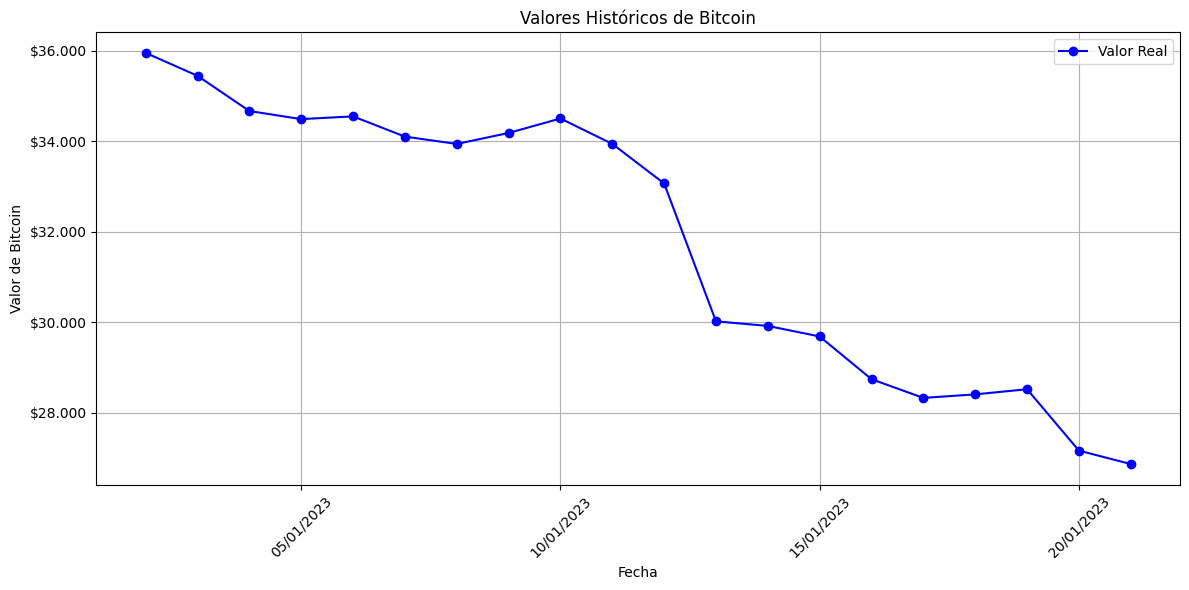

¿En qué fecha quieres saber el valor de bitcoin? (dd/mm/yyyy) 
4/11/2023
Valor predicho para el 04/11/2023 es 31.415 USD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

def y_value_formatter(value, pos):
    return f'${value:.3f}'  # mostrar el valor completo del bitcoin

#Se usó el modelo de regresión

data = pd.DataFrame({
    'Fecha': ["2/01/2023", "3/01/2023", "4/01/2023", "5/01/2023", "6/01/2023", "7/01/2023", "8/01/2023", "9/01/2023", "10/01/2023", "11/01/2023", "12/01/2023", "13/01/2023", "14/01/2023", "15/01/2023", "16/01/2023", "17/01/2023", "18/01/2023", "19/01/2023", "20/01/2023", "21/01/2023"],
    'Último': ["35.953", "35.447", "34.669", "34.490", "34.551", "34.104", "33.942", "34.184", "34.504", "33.943", "33.069", "30.023", "29.922", "29.689", "28.745", "28.332", "28.410", "28.524", "27.168", "26.871"],
    'Apertura': ["34.335", "34.669", "34.490", "34.552", "34.104", "33.942", "34.184", "34.504", "33.943", "33.069", "30.023", "29.922", "29.689", "28.745", "28.332", "28.410", "28.524", "27.168", "26.871", "26.875"],
    'Máximo': ["35.953", "35.561", "34.730", "34.876", "34.783", "34.494", "34.268", "34.843", "35.147", "35.175", "33.525", "30.225", "30.343", "30.232", "28.904", "28.978", "28.624", "30.067", "27.297", "26.995"],
    'Mínimo': ["34.335", "34.114", "34.111", "34.117", "33.969", "33.906", "33.430", "33.770", "33.756", "32.852", "29.923", "29.704", "29.478", "28.619", "28.155", "28.171", "28.109", "27.129", "26.832", "26.830"],
    'Vol.': ["2,79K", "1,99K", "1,39K", "1,36K", "1,50K", "0,75K", "1,12K", "1,01K", "2,24K", "5,30K", "6,76K", "0,50K", "0,79K", "3,15K", "1.56K", "1.02K", "0.83K", "4.31K", "0.47K", "0.36K"],
    '% var.': ["-1,82%", "2,24%", "0,52%", "-0,18%", "1,31%", "0,48%", "-0,71%", "-0,93%", "1,65%", "2,64%", "10,15%", "0,34%", "0,78%", "3,28%", "1,46%", "-0,27%", "-0,40%", "4,99%", "1,11%", "-0,01%"]
})

# Agrega la columna de etiqueta (1 para aumentar, 0 para disminuir)
data['Etiqueta'] = (data['% var.'].str.replace('%', '', regex=True).str.replace(',', '.', regex=True).astype(float) > 0).astype(int)

# Realiza la conversión adecuada de tus datos en el formato necesario
data['% var.'] = data['% var.'].str.replace('%', '', regex=True).str.replace(',', '.', regex=True).astype(float)
data['Vol.'] = data['Vol.'].str.replace('K', '', regex=True).str.replace(',', '.', regex=True).astype(float)
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

# Convierte la fecha en características numéricas (día, mes, año)
data['Dia'] = data['Fecha'].dt.day
data['Mes'] = data['Fecha'].dt.month
data['Año'] = data['Fecha'].dt.year

# Separa los datos
X = data[['Dia', 'Mes', 'Año', 'Último']]
y = data['Último'].str.replace(',', '.', regex=True).astype(float)

# Divide los datos en conjuntos de entrenamiento, y prueba con 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrena un modelo (en este caso, RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la métrica de desempeño (Error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio: {mse:.2f}")

# Grafico, variaciones de las fechas y sus precios
plt.figure(figsize=(12, 6))
plt.plot(data['Fecha'], data['Último'].str.replace(',', '.', regex=True).astype(float), marker='o', label='Valor Real', linestyle='-', color='b')
plt.xlabel('Fecha')
plt.ylabel('Valor de Bitcoin')
plt.title('Valores Históricos de Bitcoin')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_value_formatter))
plt.legend()
plt.tight_layout()

# Muestra el gráfico
plt.show()

fecha_futura = input("¿En qué fecha quieres saber el valor de bitcoin? (dd/mm/yyyy) \n")

# Fecha al formato correcto
fecha_futura = pd.to_datetime(fecha_futura, format='%d/%m/%Y')

# Utiliza el modelo entrenado para hacer la predicción
valor_predicho = model.predict([[fecha_futura.day, fecha_futura.month, fecha_futura.year, 0]])

print(f"Valor predicho para el {fecha_futura.strftime('%d/%m/%Y')} es {valor_predicho[0]:.3f} USD")
